In [760]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/14.csv


In [761]:
data = pd.read_csv('/kaggle/input/14.csv')
data.head(13)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,9.26,204.2,13.26,0.23,0.78,0.40,1.37,1.23,0.23,1.45,26006,167.69,47750,6.40,166.32,10.08,17.72
1,9.38,209.6,10.16,0.24,0.75,0.26,1.49,1.04,0.39,1.30,23935,186.10,50391,7.80,92.88,14.76,18.39
2,12.11,222.6,13.72,0.19,0.68,0.40,1.44,1.80,0.43,1.37,22589,220.45,43149,9.76,158.04,6.48,26.46
3,10.81,236.7,12.85,0.17,0.70,0.50,1.42,0.43,0.18,1.65,21220,169.30,41089,7.90,93.96,21.96,22.37
4,9.35,62.0,10.63,0.23,0.62,0.40,1.35,0.88,0.15,1.91,7394,39.53,14257,5.35,173.88,11.88,28.13
5,9.87,53.1,9.12,0.43,0.76,0.19,1.39,0.57,0.34,1.68,11586,40.41,22661,9.90,162.30,12.60,17.55
6,8.17,172.1,25.83,0.31,0.73,0.25,1.16,1.72,0.38,1.94,26609,102.96,52509,4.50,88.56,11.52,21.92
7,9.12,56.5,23.39,0.26,0.71,0.44,1.27,1.70,0.09,1.89,7801,37.02,14903,4.88,101.16,8.28,19.52
8,5.88,52.6,14.68,0.49,0.69,0.17,1.16,0.84,0.14,1.94,11587,45.74,25587,3.46,166.32,11.52,23.99
9,6.30,46.6,10.05,0.36,0.73,0.39,1.25,0.60,0.21,2.06,9475,40.07,16821,3.60,140.76,32.40,21.76


* Об\єкти 1–10
* Ознаки 8 9 10 11 17

In [762]:
lab_14_data = pd.DataFrame(data.iloc[0:10], columns = ['8','9', '10','11','17'])
lab_14_data.head(13)

,8,9,10,11,17
0,1.23,0.23,1.45,26006,17.72
1,1.04,0.39,1.30,23935,18.39
2,1.80,0.43,1.37,22589,26.46
3,0.43,0.18,1.65,21220,22.37
4,0.88,0.15,1.91,7394,28.13
5,0.57,0.34,1.68,11586,17.55
6,1.72,0.38,1.94,26609,21.92
7,1.70,0.09,1.89,7801,19.52
8,0.84,0.14,1.94,11587,23.99
9,0.60,0.21,2.06,9475,21.76


In [763]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X=pd.DataFrame(preprocessing.normalize(lab_14_data), columns = ['8','9', '10','11','17'])
print('nX')
print(normalized_X)

nX
          8         9        10        11        17
0  0.000047  0.000009  0.000056  1.000000  0.000681
1  0.000043  0.000016  0.000054  1.000000  0.000768
2  0.000080  0.000019  0.000061  0.999999  0.001171
3  0.000020  0.000008  0.000078  0.999999  0.001054
4  0.000119  0.000020  0.000258  0.999993  0.003804
5  0.000049  0.000029  0.000145  0.999999  0.001515
6  0.000065  0.000014  0.000073  1.000000  0.000824
7  0.000218  0.000012  0.000242  0.999997  0.002502
8  0.000072  0.000012  0.000167  0.999998  0.002070
9  0.000063  0.000022  0.000217  0.999997  0.002297


In [764]:
n,p=normalized_X.shape

In [765]:
R=normalized_X.corr()
R

,8,9,10,11,17
8,1.000000,-0.069586,0.673478,-0.558897,0.608265
9,-0.069586,1.000000,0.293286,-0.246140,0.288556
10,0.673478,0.293286,1.000000,-0.866534,0.942306
11,-0.558897,-0.246140,-0.866534,1.000000,-0.974677
17,0.608265,0.288556,0.942306,-0.974677,1.000000


In [766]:
Z=R.to_numpy()
Z_det=np.linalg.det(Z)

In [767]:
np.log(Z_det)

-6.729299363128202

In [768]:
chi_2_ct=-(n-1/6*(2*p+5))*np.log(Z_det)
chi_2_ct

50.469745223461516

In [769]:
0.5*(p-1)*p

10.0

$\chi^2_{KP}=(0.05;0.5*(p-1)p=(0.05;10)=18.30704$

In [770]:
chi_2_KP=18.30704

In [771]:
if(chi_2_ct>chi_2_KP):
    print('знавчно від 0 з ймовірністю95%')

знавчно від 0 з ймовірністю95%


Собственніе числа и собственніе вектора корр матриці

In [772]:
lambdas,L=np.linalg.eig(Z)
lambdas
L

array([[ 0.39401486, -0.45950867,  0.75932843,  0.23843801,  0.01310448],
       [ 0.16811966,  0.88725674,  0.41349104,  0.11585689, -0.0106582 ],
       [ 0.52241595,  0.00665176, -0.01294402, -0.79188137, -0.31590137],
       [-0.51145931, -0.01961025,  0.41704404, -0.54890501,  0.51264254],
       [ 0.53101697,  0.03461869, -0.27991467,  0.03676518,  0.79819711]])

In [773]:

'''
C=np.matrix([[0.400,-0.122],[-0.271,0.121]])
lambdas,L=np.linalg.eig(C)
lambdas
L.T
'''


'\nC=np.matrix([[0.400,-0.122],[-0.271,0.121]])\nlambdas,L=np.linalg.eig(C)\nlambdas\nL.T\n'

In [774]:
lambdas

array([3.40851123, 1.05493646, 0.41943716, 0.10990352, 0.00721162])

In [775]:
LAMBDA=np.eye(len(lambdas))
LAMBDA=LAMBDA*(lambdas**(1/2))

Матриця навантажень

In [776]:
A=L.dot(LAMBDA)
pd.DataFrame(A, columns = ['8','9', '10','11','17'])

,8,9,10,11,17
0,0.727436,-0.471962,0.491771,0.079046,0.001113
1,0.310385,0.911302,0.267793,0.038409,-0.000905
2,0.964492,0.006832,-0.008383,-0.262522,-0.026827
3,-0.944264,-0.020142,0.270094,-0.181971,0.043534
4,0.980372,0.035557,-0.181284,0.012188,0.067784


In [777]:
sum(A[:,0]**2),sum(A[:,1]**2),sum(A[:,2]**2),sum(A[:,3]**2),sum(A[:,4]**2)

(3.408511234296411,
 1.0549364623712654,
 0.41943716198961856,
 0.10990352066437838,
 0.007211620678332251)

In [778]:
lambdas

array([3.40851123, 1.05493646, 0.41943716, 0.10990352, 0.00721162])

Text(0.5, 1.05, 'corr')

<Figure size 432x288 with 0 Axes>

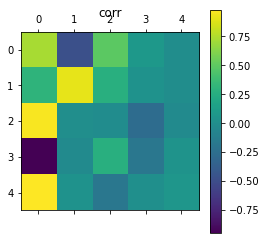

In [779]:
import matplotlib.pyplot as plt
fig = plt.figure()
cf = plt.matshow(A) #отображает массив как матрицу на графике
plt.colorbar(cf, shrink=1)
plt.title('corr')

In [780]:
pd.DataFrame(A, columns = ['8','9', '10','11','17'])

,8,9,10,11,17
0,0.727436,-0.471962,0.491771,0.079046,0.001113
1,0.310385,0.911302,0.267793,0.038409,-0.000905
2,0.964492,0.006832,-0.008383,-0.262522,-0.026827
3,-0.944264,-0.020142,0.270094,-0.181971,0.043534
4,0.980372,0.035557,-0.181284,0.012188,0.067784


In [781]:
(A[0,0]**2+A[1,0]**2+A[2,0]**2+A[4,0]**2)/lambdas[0]

0.7384093709218346

In [782]:
(A[0,0]**2+A[1,0]**2+A[2,0]**2+A[4,0]**2)/lambdas[0]
A[1,1]**2/lambdas[1]

0.7872245222694568

8,10,11,17 slabo
9 ok	Питома вага втрат від браку

Тест Лоулі і Максвелла

In [783]:
import scipy.stats as spstat

In [784]:
L.dot(LAMBDA)

array([[ 7.27436294e-01, -4.71961812e-01,  4.91771224e-01,
         7.90462541e-02,  1.11284912e-03],
       [ 3.10385101e-01,  9.11302284e-01,  2.67793207e-01,
         3.84085298e-02, -9.05107929e-04],
       [ 9.64492354e-01,  6.83203032e-03, -8.38305901e-03,
        -2.62522136e-01, -2.68267432e-02],
       [-9.44264051e-01, -2.01417113e-02,  2.70094268e-01,
        -1.81971341e-01,  4.35342513e-02],
       [ 9.80371696e-01,  3.55568867e-02, -1.81283849e-01,
         1.21882835e-02,  6.77839055e-02]])

In [785]:
Sigma=normalized_X.cov()
Sigma

,8,9,10,11,17
8,3.109498e-09,-2.551604e-11,3.069129e-09,-6.793594e-11,3.384246e-08
9,-2.551604e-11,4.324013e-11,1.576092e-10,-3.528160e-12,1.893204e-09
10,3.069129e-09,1.576092e-10,6.678707e-09,-1.543670e-10,7.683547e-08
11,-6.793594e-11,-3.528160e-12,-1.543670e-10,4.751661e-12,-2.119860e-09
17,3.384246e-08,1.893204e-09,7.683547e-08,-2.119860e-09,9.955147e-07


Для ковар.матриці використовуємо не стандлартизовані дані

In [786]:
'''
h=np.matrix([[25.5,30,25.3,28.7,26.9,14.4,20.2,26.3,39.5,21.9],
          [23.8,17.7,41.4,39.2,43.4,20.5,22.6,32.8,36.6,23.7],
          [3425,2623,6012,4245,6516,2320,2329,6802,5916,3250],
          [23.5,23.6/36.6,37.5,71.7,21.1,18,6,53.6,43.3,36],
          [1967,2043,6153,13844,8815,3540,1219,9787,7162,1783]])
norm=(h.T)
norm=pd.DataFrame(norm, columns = ['8','9', '10','11','17'])
norm.cov()

lambdas,L=np.linalg.eig(norm.cov())

L
lambdas
'''

"\nh=np.matrix([[25.5,30,25.3,28.7,26.9,14.4,20.2,26.3,39.5,21.9],\n          [23.8,17.7,41.4,39.2,43.4,20.5,22.6,32.8,36.6,23.7],\n          [3425,2623,6012,4245,6516,2320,2329,6802,5916,3250],\n          [23.5,23.6/36.6,37.5,71.7,21.1,18,6,53.6,43.3,36],\n          [1967,2043,6153,13844,8815,3540,1219,9787,7162,1783]])\nnorm=(h.T)\nnorm=pd.DataFrame(norm, columns = ['8','9', '10','11','17'])\nnorm.cov()\n\nlambdas,L=np.linalg.eig(norm.cov())\n\nL\nlambdas\n"

In [787]:
Sigma=lab_14_data.cov()
Sigma

,8,9,10,11,17
8,0.260788,0.018907,-0.024177,1.377358e+03,0.174177
9,0.018907,0.014604,-0.018940,6.221524e+02,-0.052282
10,-0.024177,-0.018940,0.072854,-1.378384e+03,0.260268
11,1377.357556,622.152444,-1378.384222,6.248796e+07,-6577.778000
17,0.174177,-0.052282,0.260268,-6.577778e+03,13.161477


In [788]:
np.linalg.det(Sigma.to_numpy())

54278.72453775951

In [789]:
lambdas,L=np.linalg.eig(Sigma)

L
lambdas

array([6.24879574e+07, 1.24784692e+01, 2.22272890e-01, 7.42269505e-03,
       4.21913944e-02])

In [790]:
sum(np.var(Sigma))

624788948843708.5

In [791]:
lambdas

array([6.24879574e+07, 1.24784692e+01, 2.22272890e-01, 7.42269505e-03,
       4.21913944e-02])

In [792]:
p=5
r=0
tmp=1
lmbd=0
for i in range(r+1):
    tmp*=lambdas[i]
    lmbd+=lambdas[i]
n1=n-r-1/6*(2*(p-r)+1+2/(p-r))
chi_2_ct=n1*(-np.log(np.linalg.det(Sigma.to_numpy()))+np.log(tmp)+(p-r)*np.log( (sum(np.var(Sigma))-lmbd)/(p-r) )  )
chi_2_ct

1371.6830131478011

In [793]:
0.5*(p-r+2)*(p-r-1)

14.0

$\chi^2_{KP}=(0.05;0.5*(p-r)*(p-r+1)-1)=(0.05;14)=23.68479$

In [794]:
chu_2_KP=23.68479

In [795]:
if(chi_2_ct>chu_2_KP):
    print('додаемо ще одну компоненту')
else:
    print('stop it')

додаемо ще одну компоненту


In [796]:
p=5
r=1
tmp=1
for i in range(r+1):
    tmp*=lambdas[i]
    lmbd+=lambdas[i]
n1=n-r-1/6*(2*(p-r)+1+2/(p-r))
chi_2_ct=n1*(-np.log(np.linalg.det(Sigma.to_numpy()))+np.log(tmp)+(p-r)*np.log( (sum(np.var(Sigma))-lmbd)/(p-r) )  )
chi_2_ct,0.5*(p-r+2)*(p-r-1)

(1040.5669615501895, 9.0)

In [797]:
chu_2_KP=16.91898
if(chi_2_ct>chu_2_KP):
    print('додаемо ще одну компоненту')
else:
    print('stop it')

додаемо ще одну компоненту


In [798]:
p=5
r=2
tmp=1
lmbd=0
for i in range(r+1):
    tmp*=lambdas[i]
    lmbd+=lambdas[i]
n1=n-r-1/6*(2*(p-r)+1+2/(p-r))
chi_2_ct=n1*(-np.log(np.linalg.det(Sigma.to_numpy()))+np.log(tmp)+(p-r)*np.log( (sum(np.var(Sigma))-lmbd)/(p-r) )  )
chi_2_ct
chi_2_ct,0.5*(p-r+2)*(p-r-1)

(719.1313677131307, 5.0)

Слід узяти перші три компонети

Критерій інформативності

In [799]:
(lambdas[0])/p

12497591.476317875

Замало

In [800]:
(lambdas[0]+lambdas[1])/p

12497593.972011711

Добре- беремо двы компоненти

Якщо брати кореляційну матрицю

In [801]:
lambdas,L=np.linalg.eig(Z)
lambdas

array([3.40851123, 1.05493646, 0.41943716, 0.10990352, 0.00721162])

In [802]:
p


5

In [803]:
r=0# пишем 0, т.к. нумерация с  0
np.log(lambdas)
chu_2_CT=-(n-1)*(sum(np.log(lambdas[r+1:p]))-(p-r)*np.log( sum(lambdas[r+1:p])/(p-r)))
chu_2_CT

20.08561457370716

In [804]:
0.5*(p-r)*(p-r+1)-1

14.0

$\chi^2_{KP}=(0.05;0.5*(p-r)*(p-r+1)-1)=(0.05;14)=23.68479$

In [805]:
chu_2_KP=23.68479

In [806]:
if(chu_2_CT>chu_2_KP):
    print('додаемо ще одну компоненту')
else:
    print('stop it')

stop it


Означає, що достатньо взщяти першу компоненту

In [807]:
r=1# пишем 0, т.к. нумерация с  0
np.log(lambdas)
chu_2_CT=-(n-1)*(sum(np.log(lambdas[r+1:p]))-(p-r)*np.log( sum(lambdas[r+1:p])/(p-r)))
chu_2_CT
0.5*(p-r)*(p-r+1)-1

9.0

$\chi^2_{KP}=(0.05;0.5*(p-r)*(p-r+1)-1)=(0.05;9)=16.91898$

In [808]:
chu_2_KP=16.91898

In [809]:
if(chu_2_CT>chu_2_KP):
    print('додаемо ще одну компоненту')
else:
    print('stop it')

stop it


Означає, що достатньо взщяти перші дві компоненти

Матриця головних компонент

In [810]:
lambdas,L_R=np.linalg.eig(Z)

In [811]:
Z=L_R.T.dot(lab_14_data.to_numpy().T)
Z

array([[-13290.32046996, -12230.85877698, -11537.80648926,
        -10840.22610267,  -3765.42288912,  -5915.28884721,
        -13596.02589552,  -3977.85632902,  -5912.17196901,
         -4833.17417261],
       [  -509.72229855,   -468.85799847,   -442.49649477,
          -415.38207257,   -144.28296716,   -226.54592019,
          -521.49069448,   -152.99257288,   -226.64237533,
          -185.12953073],
       [ 10841.69740329,   9977.73549103,   9414.72803122,
          8843.79232081,   3076.45510725,   4827.51134924,
         11092.427067  ,   3249.20019368,   4826.24469782,
          3945.91705715],
       [-14275.00045618, -13138.10153625, -12398.84828523,
        -11648.12505023,  -4058.85471255,  -6360.12325119,
        -14606.08957083,  -4282.37119358,  -6360.60007069,
         -5201.53882146],
       [ 13345.48155903,  12284.37684073,  11600.78885248,
         10895.61284803,   3812.33878726,   5952.95795955,
         13657.80746932,   4014.12952715,   5958.53452696,
          4

In [812]:
pd.DataFrame(Z.T, columns = ['8','9', '10','11','17'])

,8,9,10,11,17
0,-13290.320470,-509.722299,10841.697403,-14275.000456,13345.481559
1,-12230.858777,-468.857998,9977.735491,-13138.101536,12284.376841
2,-11537.806489,-442.496495,9414.728031,-12398.848285,11600.788852
3,-10840.226103,-415.382073,8843.792321,-11648.125050,10895.612848
4,-3765.422889,-144.282967,3076.455107,-4058.854713,3812.338787
5,-5915.288847,-226.545920,4827.511349,-6360.123251,5952.957960
6,-13596.025896,-521.490694,11092.427067,-14606.089571,13657.807469
7,-3977.856329,-152.992573,3249.200194,-4282.371194,4014.129527
8,-5912.171969,-226.642375,4826.244698,-6360.600071,5958.534527
9,-4833.174173,-185.129531,3945.917057,-5201.538821,4874.011704
